## INSAID INTERNSHIP TASK
#### By:  Syed Hamad ul Haq Andrabi
#### s4hamad@gmail.com
#### sa3184@srmist.edu.in

In [30]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### In the given types of transaction, it can be observed that there is a possibilty of fraud in Transfer and Cash_out categories. Transfer is where money is sent to the customer or fraudster and Cash_out is where money is sent to a merchant who pays the customer or fraudster in cash. As shown below, the number of Transfers marked as fraudulent is equal to the number of Cash_out's marked as fraudster. 

In [6]:

legit_transactions = len(data[data.isFraud == 0])
fraud_transactions = len(data[data.isFraud == 1])

print("\n No. of legit transactions: ", legit_transactions)
print(" No. of fraud transactions: ", fraud_transactions)

l_percent = (legit_transactions/(legit_transactions+fraud_transactions)) * 100
f_percent = (fraud_transactions/(legit_transactions+fraud_transactions)) * 100

print("\n Percentage of Legit Transactions: {:.2f} %".format(l_percent))
print(" Percentage of Fraud Transactions: {:.2f} %".format(f_percent))

print('\n Types of fraudulent data {}'.format(\
list(data.loc[data.isFraud == 1].type.drop_duplicates().values))) #To check which type of transactions might result in fraud                                    



dataFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dataFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('\n No. fraudulent TRANSFERs = {}'.format(len(dataFraudTransfer)))

print (' The number of fraudulent CASH_OUTs = {}'.format(len(dataFraudCashout))) 


 No. of legit transactions:  6354407
 No. of fraud transactions:  8213

 Percentage of Legit Transactions: 99.87 %
 Percentage of Fraud Transactions: 0.13 %

 Types of fraudulent data ['TRANSFER', 'CASH_OUT']

 No. fraudulent TRANSFERs = 4097
 The number of fraudulent CASH_OUTs = 4116


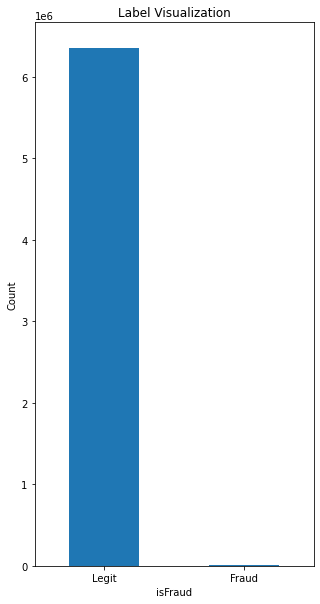

In [7]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]

count = data.value_counts(data['isFraud'], sort = True)
count.plot(kind = "bar", rot = 0)

plt.title("Label Visualization")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#### It can be observed that the given dataset is highly imbalanced. 

#### nameDest elements starting with the letter 'M' stand for merchants

In [8]:
Merchant_Details = data[data['nameDest'].str.contains('M')]
Merchant_Details.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


#### Plotting the correlation heatmap 

<AxesSubplot:>

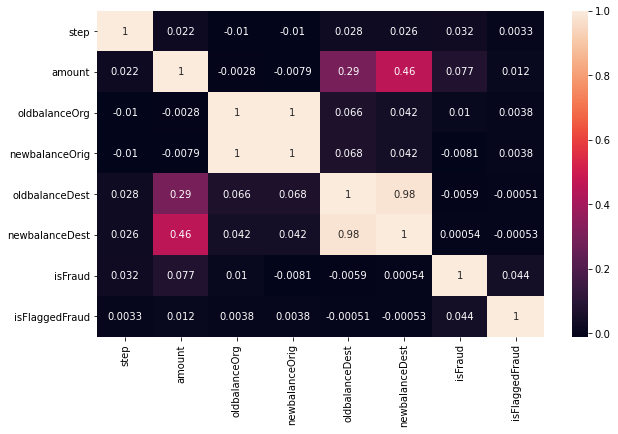

In [9]:
corr = data.corr()

plt.figure(figsize=(10,6))

sns.heatmap(corr,annot=True)

### Training and Testing 

In [10]:
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Three attributes are of the object datatype. We need to Label Encode them inorder to check for multicollinearity

In [12]:
objects = df.select_dtypes(include = "object").columns
print(objects)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()

for i in objects: 
    df[i] = le.fit_transform(df[i].astype(str))
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### Multicollinearity

#### When features are highly correlated among themselves, we usually say that a problem of multicollinearity or intercorrelation exists. 

#### We can spot multicollinearity by calculating the Variance Inflation Factor (VIF). The rule of thumb with VIF is that it shouldn't be greated than 10.
#### VIF = 1/(1-R^2) 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(data):
    
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calculate_VIF(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


#### Columns oldbalanceOrg, newbalanceOrg, oldbalanceDest and newbalanceDest  have a very large VIF which means that they are highly correlated. nameDest is connected to nameOrig. We drop individual columns and combine the others.

In [16]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)


df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calculate_VIF(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


#### As evident from the above table, VIF of each element is under 10

<AxesSubplot:>

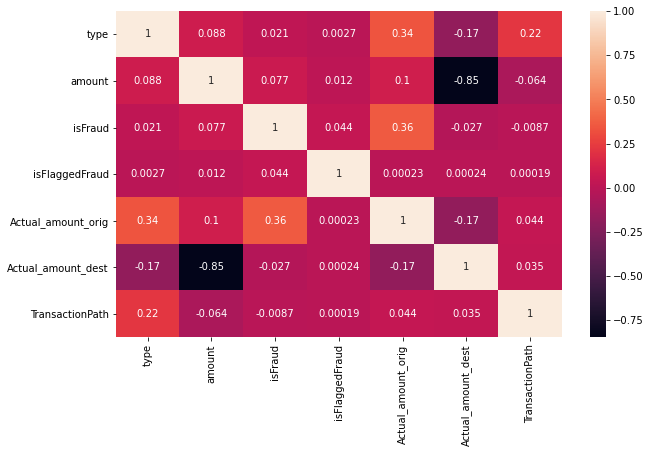

In [17]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

### Q How did you select variables to be included in the model? 
#### Use the correlation heatmap and VIF data. Simply look for any traits that are highly connected with one another, and then discard any that are less correlated with the isFraud Attribute.

In [18]:
df.head()

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,3,9839.64,0,0,9839.64,0.0,2419963.0
1,3,1864.28,0,0,1864.28,0.0,3922922.0
2,4,181.00,1,0,181.00,0.0,1441841.0
3,1,181.00,1,0,181.00,21182.0,6219958.0
4,3,11668.14,0,0,11668.14,0.0,4274900.0


#### Normalizing Amount

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df['Normal_Amount'] = scaler.fit_transform(df["amount"].values.reshape(-1,1))

df.drop(["amount"], inplace=True, axis=1)

X = df.drop(["isFraud"],axis = 1) #independent variables
y = df["isFraud"] #dependent variable

In [21]:
df.head()

,type,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,Normal_Amount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532


#### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size = 0.3, random_state = 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### Model Training

In [24]:
import itertools
from collections import Counter
import sklearn.metrics as metrics

#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_pred_dt = decision_tree.predict(X_test)
dt_score = decision_tree.score(X_test, y_test) * 100

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)

y_pred_rf = random_forest.predict(X_test)
rf_score = random_forest.score(X_test, y_test)*100

### Evaluation

In [29]:
#Scores of our classifiers 

print("Decision Tree: ", dt_score)
print("Random Forest: ", rf_score)

Decision Tree:  99.92283053207642
Random Forest:  99.95871721607347


### Confusion matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### For Decision Tree

In [35]:
print("Confusion matrix for Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Confusion matrix for Decision Tree
True Positives: 1719
False Positives: 757
True Negatives: 1905594
False Negatives: 716


#### For Random Forest

In [38]:
print("Confusion matrix for Random Forest")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Confusion matrix for Random Forest
True Positives: 1710
False Positives: 63
True Negatives: 1906288
False Negatives: 725


#### It is clear from the steps performed above that Random Forest is better than Decision Trees in  terms of Flase Positive rate and also in terms of True negative rate. FP(Decision Tree) >> FP(Random Forest) & TN(Decision Tree) < TN(Random Forest) 

In [40]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[1905594     757]
 [    716    1719]]


In [41]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906288      63]
 [    725    1710]]


#### Classification Report

In [43]:
class_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(class_rep_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [44]:
class_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(class_rep_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



#### Random Forest performs better in terms of precision and F1 score as well.

####  Visualising confusion matrix - DT

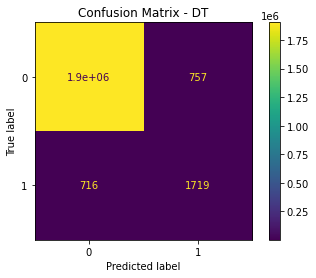

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

#### Visualising confusion matrix - RF


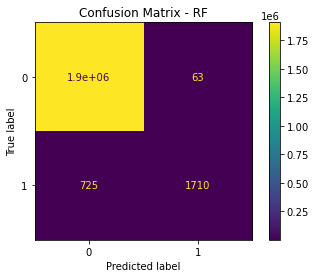

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

### AUC ROC - Decision Tree
#### Calculate the fpr and tpr for all thresholds of the classification

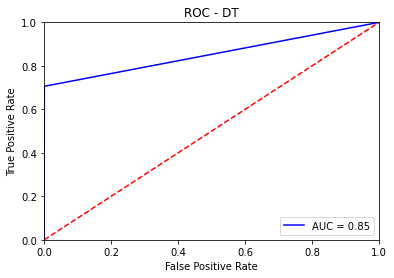

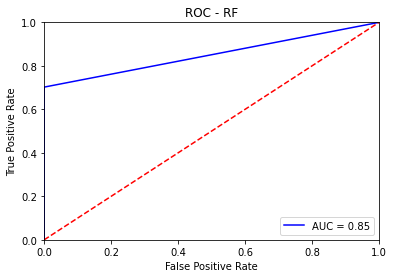

In [49]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC ROC - Random Forest 
#### calculate the fpr and tpr for all thresholds of the classification


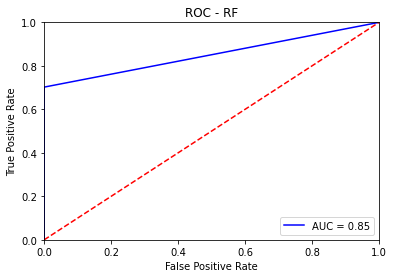

In [50]:

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion

We have seen that, while Random Forest has greater precision, accuracy for both it and Decision Tree is equal. Precision is crucial in a fraud detection model because, instead of properly predicting legitimate transactions, we want to forecast fraudulent ones while ignoring legitimate ones. If either of the two conditions is not met, we risk catching the innocent person while ignoring the offender.
This is another justification for choosing Random Forest and Decision Tree over other algorithms.
Additionally, the very uneven dataset is another factor in my decision to employ this model (Legit: Fraud :: 99.87:0.13). Since decision trees make judgments in a boolean manner, random forest creates numerous decision trees, which helps the model interpret the input more simply (albeit it takes time).
While XGBoost, Bagging, ANN, and Logistic Regression models may provide good accuracy, their precision and recall values will be subpar.

#### Q. What are the key factors that predict fraudulent customer?

1. Is the request's source secured or not?
2. Is the name of the organisation requesting money legitimate or not?
3. Vendor transaction history.

#### Q. What kind of prevention should be adopted while company update its infrastructure?
1. Use only intelligent vertified apps.
2. Visit websites that have been safeguarded.
3. Make use of secure internet connections (USE VPN).
4. Update the security on your laptop and mobile device.
5. Don't reply to unauthorised calls, SMSes, or emails.
6. Contact your bank right away if you believe your security has been violated or you have been duped.

#### Q. Assuming these actions have been implemented, how would you determine if they work?
1. Bank electronic statements.
2. Customers monitoring the activity on their accounts.
3. Keep a record of all of your payments.

